In [ ]:
#Random-Forest-Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("Position_Salaries.csv")
print (df)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [ ]:
sc = StandardScaler()


x = df[["Level"]]
y = df[["Salary"]]
y = sc.fit_transform(y)

y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3.0, random_state=42)

In [ ]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(x_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [ ]:
y_pred= regressor.predict(x_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Out-of-Bag Score: 0.1393978944269847
Mean Squared Error: 0.004143821924134282
R-squared: 0.9903304253491841


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


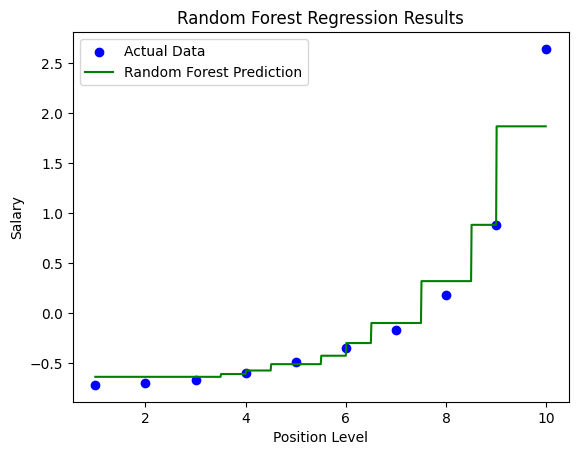

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert x to NumPy array
x_np = x.values
y_np = y  # if y is already a 1D array or list-like

# Generate X_grid using the first feature (Position Level)
X_grid = np.arange(min(x_np[:, 0]), max(x_np[:, 0]), 0.01).reshape(-1, 1)

# Predict on the fine grid
y_pred = regressor.predict(X_grid)

# Plot
plt.scatter(x_np[:, 0], y_np, color='blue', label="Actual Data")
plt.plot(X_grid, y_pred, color='green', label="Random Forest Prediction")
plt.title("Random Forest Regression Results")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()
